In [1]:
import seaborn as sns
import csv
import pandas as pd

In [2]:
df = pd.read_csv('diabetes_covid_topics_sentiment.csv')
df.head()

,Dominant,compound
0,Accessing Doctor and Medications & Controling ...,-0.9434
1,Accessing Doctor and Medications & Controling ...,-0.6542
2,Accessing Doctor and Medications & Controling ...,-0.4885
3,Accessing Doctor and Medications & Controling ...,0.4939
4,Accessing Doctor and Medications & Controling ...,0.6896


In [4]:
sns.set_theme(style="whitegrid")

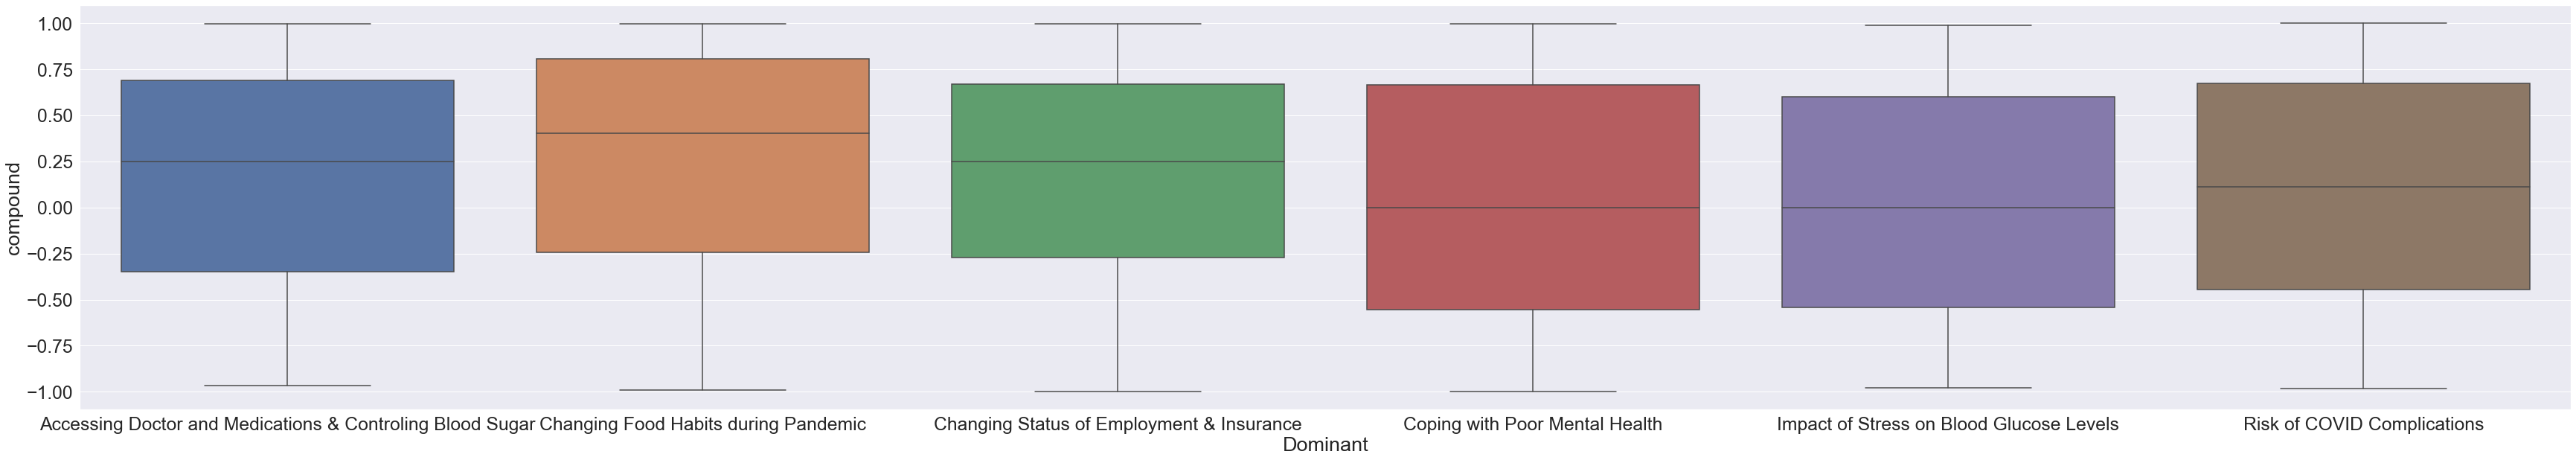

In [49]:
sns.set(rc={'figure.figsize':(60, 10)})
sns.set(font_scale=2.25)
ax = sns.boxplot(x="Dominant", y="compound", data= df)

In [23]:
df = pd.read_csv('diabetes_compound_boxplot.csv')
df.head()

,Publish Date,compound,year
0,2018-01-01 9:16,0.5319,2018
1,2018-01-02 0:58,-0.9600,2018
2,2018-01-02 8:55,0.9133,2018
3,2018-03-26 22:23,0.8477,2018
4,2018-05-27 16:56,0.0000,2018


In [3]:
sns.set_theme(style="whitegrid")

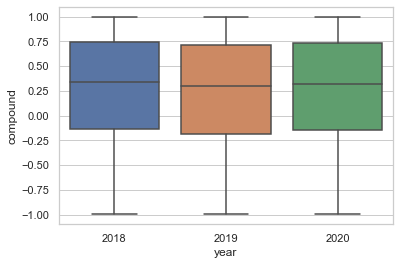

In [25]:
ax = sns.boxplot(x="year", y="compound", data= df)

In [7]:
df = pd.read_csv('diabetes_compound_jan_mar.csv')
df.head()

,month_year,compound
0,20-Jan,0.8807
1,20-Jan,-0.0132
2,20-Jan,0.9062
3,20-Jan,0.6124
4,20-Jan,0.4144


In [8]:
sns.set_theme(style="whitegrid")

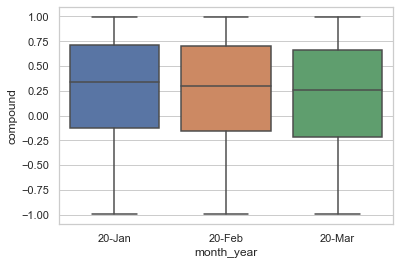

In [9]:
ax = sns.boxplot(x="month_year", y="compound", data= df)

In [3]:
df = pd.read_csv('diabetes_covid_noncovid_sentiment.csv')
df.head()

,compound,classification
0,-0.4767,noncovid
1,-0.2960,noncovid
2,0.7317,noncovid
3,0.3612,noncovid
4,0.9867,noncovid


In [4]:
sns.set_theme(style="whitegrid")

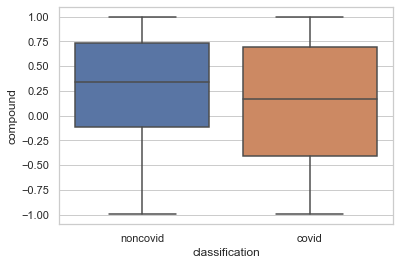

In [5]:
ax = sns.boxplot(x="classification", y="compound", data= df)

In [14]:
df = pd.read_csv('all_sentiment.csv')
df.head()

,compound,classification,Theme
0,-0.5006,ALL,Coping & Receiving Support
1,0.0000,ALL,Coping & Receiving Support
2,-0.9667,ALL,Coping & Receiving Support
3,-0.9764,ALL,Coping & Receiving Support
4,-0.7430,ALL,Coping & Receiving Support


In [15]:
sns.set_theme(style="whitegrid")

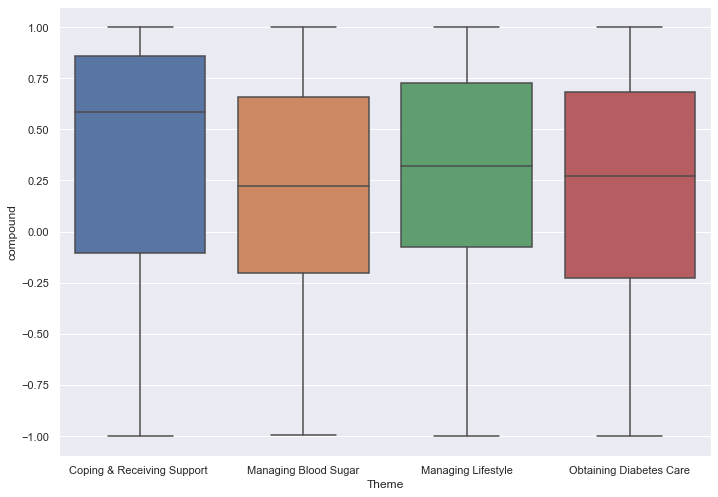

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Theme", y="compound", data= df)

In [17]:
df = pd.read_csv('all_sentiment_covid_noncovid.csv')
df.head()

,compound,classification,Theme
0,-0.7964,noncovid,Coping & Receiving Support
1,-0.6712,noncovid,Coping & Receiving Support
2,-0.9529,noncovid,Coping & Receiving Support
3,-0.7273,noncovid,Coping & Receiving Support
4,0.6438,noncovid,Coping & Receiving Support


In [18]:
sns.set_theme(style="whitegrid")

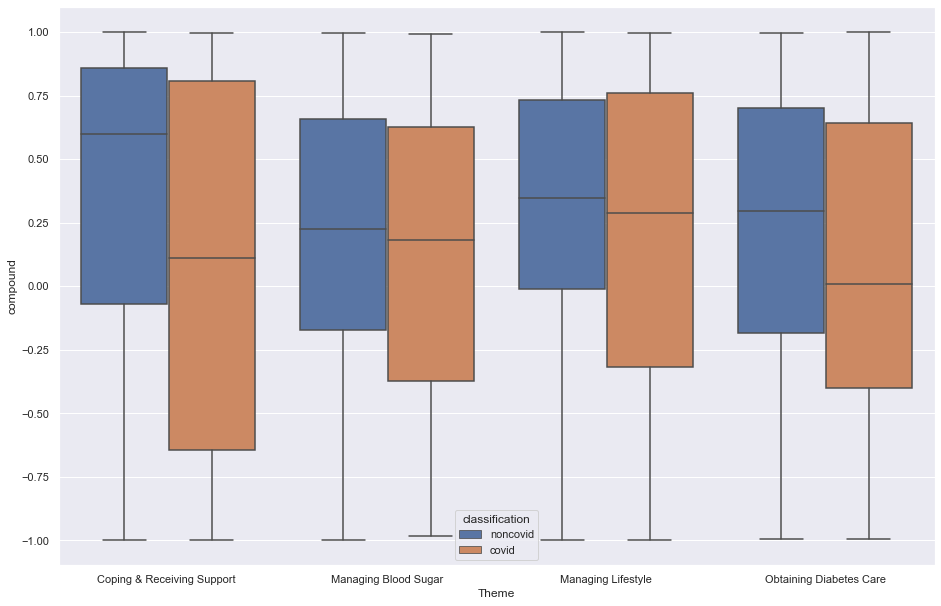

In [19]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
ax = sns.boxplot(x= "Theme", hue = "classification", y="compound", data= df)

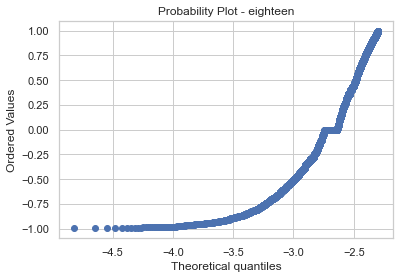

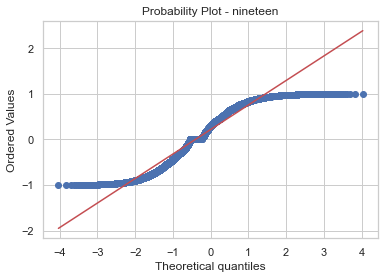

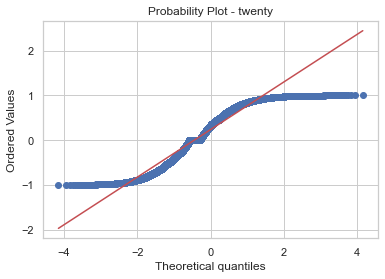

TypeError: can only concatenate str (not "float") to str

In [13]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_majors = df['word'].unique()
for major in unique_majors:
    stats.probplot(df[df['word'] == major]['compound'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [14]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = df.groupby('word').std().max() / df.groupby('word').std().min()
ratio

year            NaN
compound    1.00909
dtype: float64

In [15]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = df['compound'].mean()
SSTR = df.groupby('word').count() * (df.groupby('word').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['compound'].sum()

# calculate SSE and update anova table
SSE = (df.groupby('word').count() - 1) * df.groupby('word').std()**2
anova_table['SS']['Within Groups'] = SSE['compound'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['compound'].sum() + SSE['compound'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df['compound'].nunique() - 1
anova_table['df']['Within Groups'] = df.shape[0] - df['word'].nunique()
anova_table['df']['Total'] = df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,9.056396,13073,0.000693,0.031081,1.0,1.024543
Within Groups,23371.351923,1048572,0.022289,,,
Total,23380.408319,1048574,0.022297,,,


In [16]:
diabetes_2018 = pd.read_csv('diabetes_everything 2018.csv')
diabetes_2019 = pd.read_csv('diabetes_everything 2019.csv')
diabetes_2020 = pd.read_csv('diabetes_everything 2020.csv')

In [17]:
diabetes_2018

,Post ID,Author,Publish Date,Text,Permalink,Title,Dominant,month_year,compound,neg,neu,pos,classification,Theme
0,7ng7rl,penguinsarefun,2018-01-01 9:16,Hey all! Happy New year's! Just wanted to say ...,/r/diabetes/comments/7ng7rl/t2_newbie/,T2 Newbie,Topic 4,18-Jan,0.5319,0.087,0.797,0.116,NaN,Managing Blood Sugar
1,7nlbda,MrCanoe,2018-01-02 0:58,"Hello I'm a 6'1, 260lbs male with Type 2 diabe...",/r/diabetes/comments/7nlbda/looking_into_keto_...,"Looking into Keto diet, how serious are risks ...",Topic 4,18-Jan,-0.9600,0.108,0.846,0.046,NaN,Managing Blood Sugar
2,7nnmor,Heylola2,2018-01-02 8:55,I had my a1c checked today and it's at 5.1!!! ...,/r/diabetes/comments/7nnmor/great_start_to_the...,Great start to the new year!!,Topic 4,18-Jan,0.9133,0.071,0.787,0.142,NaN,Managing Blood Sugar
3,dwcllds,[deleted],2018-03-26 22:23,Hey this is an old post but congrats! This is...,/r/diabetes/comments/7nnmor/great_start_to_the...,NaN,Topic 1,18-Mar,0.8477,0.048,0.764,0.189,NaN,Managing Lifestyle
4,dzokqh6,Heylola2,2018-05-27 16:56,I stick my fitbit on my ankle to count 'steps'...,/r/diabetes/comments/7nnmor/great_start_to_the...,NaN,Topic 1,18-May,0.0000,0.000,1.000,0.000,NaN,Managing Lifestyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10492,ecv4dtv,AccidentalDragon,2018-12-30 2:02,"In 6 mos, my A1c went from 10.5-ish to 6.7, my...",/r/type2diabetes/comments/aaqljf/type_2_lookin...,NaN,Topic 9,18-Dec,-0.2003,0.112,0.799,0.089,NaN,Managing Lifestyle
10493,ecve2zu,gnilmit,2018-12-30 5:56,What everyone else said. I don't even do full ...,/r/type2diabetes/comments/aaqljf/type_2_lookin...,NaN,Topic 9,18-Dec,0.6124,0.000,0.958,0.042,NaN,Managing Lifestyle
10494,ecwd91h,jacobi123,2018-12-30 13:32,A perfect example of not letting the perfect b...,/r/type2diabetes/comments/aaqljf/type_2_lookin...,NaN,Topic 7,18-Dec,0.0263,0.281,0.433,0.286,NaN,Coping & Receiving Support
10495,ecwiejq,FlowMang,2018-12-30 14:31,Same. Mine was 9.3. Was down to 5.5 after 90 d...,/r/type2diabetes/comments/aaqljf/type_2_lookin...,NaN,Topic 3,18-Dec,0.8625,0.000,0.884,0.116,NaN,Managing Blood Sugar
